In [107]:
import sys
sys.path.append('../')

from PIL import Image
import numpy as np
from raypy.camera import Camera
from raypy.ray import Ray
from raypy.geometry.sphere import Sphere
from raypy.ray import Hit
from raypy.utils.constants import *
from raypy.utils.vector3 import vec3, rgb, extract
from functools import reduce as reduce

In [108]:
sphere = Sphere(vec3(0,0,0), None, 1.0)
index_of_refraction = vec3(1.0,1.0,1.0)
camera = Camera(screen_width=300 ,screen_height=300, look_from = vec3(0, 0, 10), look_at = vec3(0,0,0), focal_distance= 1., field_of_view= 40)

In [109]:
rays = camera.get_ray(index_of_refraction)

In [110]:
colliderList = sphere.collider_list

intersects = [c.intersect(rays.origin, rays.dir) for c in colliderList]
# intersect every ray with the sphere

In [111]:
distances, hit_orientation = zip(*intersects)
# distances

In [112]:
nearest = reduce(np.minimum, distances)
color = rgb(0., 0., 0.)

In [113]:
zipped = zip(colliderList, distances, hit_orientation)

for (coll, dis, orient) in zipped:
    hit_check = (nearest != FARAWAY) & (dis == nearest)

    if np.any(hit_check):
        hit_info = Hit(extract(hit_check, dis), extract(hit_check, orient), material=None, collider=coll, surface=coll.assigned_primitive)

        ray = rays.extract(hit_check)
        origin = ray.origin
        direction = ray.dir
        hit_info.point = origin + direction * hit_info.distance
        normal = hit_info.get_normal()

        cc = normal * 0.5 + 0.5
        color += cc.place(hit_check)

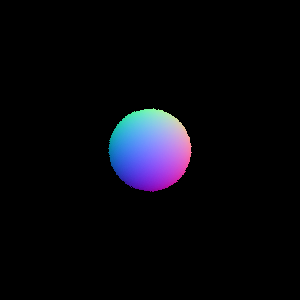

In [114]:
color = color.to_array()

img_RGB = []
for c in color:
    # create an image layer from every rgb channel
    img_RGB += [Image.fromarray((255 * np.clip(c, 0, 1).reshape((300, 300))).astype(np.uint8), "L")]

img = Image.merge("RGB", img_RGB)
display(img)